In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import requests
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
raw = pd.read_csv("/content/drive/My Drive/rubicon_logreg/data/nri_firerisk.csv")
raw

,OID_,NRI_ID,STATE,STATEABBRV,STATEFIPS,COUNTY,COUNTYTYPE,COUNTYFIPS,STCOFIPS,POPULATION,...,WNTW_EALS,WNTW_EALR,WNTW_ALRB,WNTW_ALRP,WNTW_ALRA,WNTW_ALR_NPCTL,WNTW_RISKV,WNTW_RISKS,WNTW_RISKR,NRI_VER
0,1,C01001,Alabama,AL,1,Autauga,County,1,1001,58764,...,15.784587,Very Low,2.687716e-07,7.410082e-09,8.725777e-06,10.461158,8494.906508,12.217626,Very Low,March 2023
1,2,C01003,Alabama,AL,1,Baldwin,County,3,1003,231365,...,56.205509,Relatively Moderate,1.268231e-09,2.287120e-08,1.548360e-07,13.339523,65619.701638,52.083996,Relatively Low,March 2023
2,3,C01005,Alabama,AL,1,Barbour,County,5,1005,25160,...,18.632002,Relatively Low,5.788050e-07,2.347236e-08,7.606598e-07,16.125039,15501.730335,19.535476,Very Low,March 2023
3,4,C01007,Alabama,AL,1,Bibb,County,7,1007,22239,...,13.308573,Very Low,9.014679e-07,1.270300e-08,1.202015e-05,16.991643,7496.186940,11.104041,Very Low,March 2023
4,5,C01009,Alabama,AL,1,Blount,County,9,1009,58992,...,23.645930,Relatively Low,5.268425e-07,1.482016e-08,2.002965e-07,12.039616,17175.160729,21.444480,Very Low,March 2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3227,C72151,Puerto Rico,PR,72,Yabucoa,Municipio,151,72151,30397,...,0.000000,No Expected Annual Losses,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,Insufficient Data,March 2023
3227,3228,C72153,Puerto Rico,PR,72,Yauco,Municipio,153,72153,34151,...,0.000000,No Expected Annual Losses,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,Insufficient Data,March 2023
3228,3229,C78010,Virgin Islands,VI,78,St. Croix,Island,10,78010,40913,...,0.000000,No Expected Annual Losses,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,Insufficient Data,March 2023
3229,3230,C78020,Virgin Islands,VI,78,St. John,Island,20,78020,3882,...,0.000000,No Expected Annual Losses,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,Insufficient Data,March 2023


In [9]:
raw_temp = pd.read_csv("/content/drive/My Drive/rubicon_logreg/data/average_temp.csv")

raw_temp.head(10)

,ID,Name,State,Value,Anomaly (1901-2000 base period),Rank,1901-2000 Mean
0,AL-001,Autauga County,Alabama,79.1,2.3,124,76.8
1,AL-003,Baldwin County,Alabama,80.3,2.3,123,78.0
2,AL-005,Barbour County,Alabama,79.0,1.9,121,77.1
3,AL-007,Bibb County,Alabama,77.9,1.9,116,76.0
4,AL-009,Blount County,Alabama,76.8,2.4,120,74.4
5,AL-011,Bullock County,Alabama,78.3,1.7,114,76.6
6,AL-013,Butler County,Alabama,78.8,2.0,120,76.8
7,AL-015,Calhoun County,Alabama,76.8,2.3,121,74.5
8,AL-017,Chambers County,Alabama,76.8,2.2,123,74.6
9,AL-019,Cherokee County,Alabama,76.3,1.8,110,74.5


In [10]:
raw_temp['Name'] = raw_temp['Name'].str.replace(' County', '', regex=False)

raw_temp.head()

,ID,Name,State,Value,Anomaly (1901-2000 base period),Rank,1901-2000 Mean
0,AL-001,Autauga,Alabama,79.1,2.3,124,76.8
1,AL-003,Baldwin,Alabama,80.3,2.3,123,78.0
2,AL-005,Barbour,Alabama,79.0,1.9,121,77.1
3,AL-007,Bibb,Alabama,77.9,1.9,116,76.0
4,AL-009,Blount,Alabama,76.8,2.4,120,74.4


In [11]:
wild_risk_score = raw[['STATE', 'COUNTY', 'WFIR_RISKR']]
wild_risk_score.head()

,STATE,COUNTY,WFIR_RISKR
0,Alabama,Autauga,Very Low
1,Alabama,Baldwin,Relatively Moderate
2,Alabama,Barbour,Very Low
3,Alabama,Bibb,Very Low
4,Alabama,Blount,Very Low


In [12]:
merged_df = pd.merge(
    raw_temp,
    wild_risk_score,
    how='inner',
    left_on=['Name', 'State'],
    right_on=['COUNTY', 'STATE']
)
merged_df.head()

,ID,Name,State,Value,Anomaly (1901-2000 base period),Rank,1901-2000 Mean,STATE,COUNTY,WFIR_RISKR
0,AL-001,Autauga,Alabama,79.1,2.3,124,76.8,Alabama,Autauga,Very Low
1,AL-003,Baldwin,Alabama,80.3,2.3,123,78.0,Alabama,Baldwin,Relatively Moderate
2,AL-005,Barbour,Alabama,79.0,1.9,121,77.1,Alabama,Barbour,Very Low
3,AL-007,Bibb,Alabama,77.9,1.9,116,76.0,Alabama,Bibb,Very Low
4,AL-009,Blount,Alabama,76.8,2.4,120,74.4,Alabama,Blount,Very Low


In [13]:
merged_df = merged_df.drop(merged_df.columns[[0, 4, 5, 6, 7]], axis=1)
merged_df.head()

,Name,State,Value,COUNTY,WFIR_RISKR
0,Autauga,Alabama,79.1,Autauga,Very Low
1,Baldwin,Alabama,80.3,Baldwin,Relatively Moderate
2,Barbour,Alabama,79.0,Barbour,Very Low
3,Bibb,Alabama,77.9,Bibb,Very Low
4,Blount,Alabama,76.8,Blount,Very Low


In [14]:
raw_precip = pd.read_csv("/content/drive/My Drive/rubicon_logreg/data/average_precipitation.csv")

raw_precip.head(10)

,ID,Name,State,Value,Anomaly (1901-2000 base period),Rank,1901-2000 Mean
0,AL-001,Autauga County,Alabama,55.94,2.39,75,53.55
1,AL-003,Baldwin County,Alabama,54.05,-7.88,30,61.93
2,AL-005,Barbour County,Alabama,54.52,2.24,74,52.28
3,AL-007,Bibb County,Alabama,46.97,-8.28,22,55.25
4,AL-009,Blount County,Alabama,52.16,-3.45,42,55.61
5,AL-011,Bullock County,Alabama,59.25,7.19,106,52.06
6,AL-013,Butler County,Alabama,56.42,0.73,64,55.69
7,AL-015,Calhoun County,Alabama,49.58,-3.80,44,53.38
8,AL-017,Chambers County,Alabama,57.06,3.76,83,53.30
9,AL-019,Cherokee County,Alabama,48.73,-4.84,39,53.57


In [15]:
raw_precip['Name'] = raw_precip['Name'].str.replace(' County', '', regex=False)

raw_precip.head()

,ID,Name,State,Value,Anomaly (1901-2000 base period),Rank,1901-2000 Mean
0,AL-001,Autauga,Alabama,55.94,2.39,75,53.55
1,AL-003,Baldwin,Alabama,54.05,-7.88,30,61.93
2,AL-005,Barbour,Alabama,54.52,2.24,74,52.28
3,AL-007,Bibb,Alabama,46.97,-8.28,22,55.25
4,AL-009,Blount,Alabama,52.16,-3.45,42,55.61


In [16]:
merged_precipitation = pd.merge(
    raw_precip,
    merged_df,
    how='inner',
    left_on=['Name', 'State'],
    right_on=['Name', 'State']
)
merged_precipitation.head()

,ID,Name,State,Value_x,Anomaly (1901-2000 base period),Rank,1901-2000 Mean,Value_y,COUNTY,WFIR_RISKR
0,AL-001,Autauga,Alabama,55.94,2.39,75,53.55,79.1,Autauga,Very Low
1,AL-003,Baldwin,Alabama,54.05,-7.88,30,61.93,80.3,Baldwin,Relatively Moderate
2,AL-005,Barbour,Alabama,54.52,2.24,74,52.28,79.0,Barbour,Very Low
3,AL-007,Bibb,Alabama,46.97,-8.28,22,55.25,77.9,Bibb,Very Low
4,AL-009,Blount,Alabama,52.16,-3.45,42,55.61,76.8,Blount,Very Low


In [17]:
merged_precipitation.rename(columns={'Value_x': 'Average Annual Precipitation', 'Value_y': 'Average Summer Temperature', 'State_x': 'State'}, inplace=True)
merged_precipitation.head()

,ID,Name,State,Average Annual Precipitation,Anomaly (1901-2000 base period),Rank,1901-2000 Mean,Average Summer Temperature,COUNTY,WFIR_RISKR
0,AL-001,Autauga,Alabama,55.94,2.39,75,53.55,79.1,Autauga,Very Low
1,AL-003,Baldwin,Alabama,54.05,-7.88,30,61.93,80.3,Baldwin,Relatively Moderate
2,AL-005,Barbour,Alabama,54.52,2.24,74,52.28,79.0,Barbour,Very Low
3,AL-007,Bibb,Alabama,46.97,-8.28,22,55.25,77.9,Bibb,Very Low
4,AL-009,Blount,Alabama,52.16,-3.45,42,55.61,76.8,Blount,Very Low


In [18]:
merged_precipitation.drop(merged_precipitation.columns[[0, 4, 5, 6, 8]], axis=1, inplace=True)
merged_precipitation.head()

,Name,State,Average Annual Precipitation,Average Summer Temperature,WFIR_RISKR
0,Autauga,Alabama,55.94,79.1,Very Low
1,Baldwin,Alabama,54.05,80.3,Relatively Moderate
2,Barbour,Alabama,54.52,79.0,Very Low
3,Bibb,Alabama,46.97,77.9,Very Low
4,Blount,Alabama,52.16,76.8,Very Low


In [19]:
raw_drought = pd.read_csv("/content/drive/My Drive/rubicon_logreg/data/drought_data.csv")

raw_drought.head(10)

,ID,Name,State,Value,Anomaly (1901-2000 base period),Rank,1901-2000 Mean
0,AL-001,Autauga County,Alabama,-0.11,-0.06,61,-0.06
1,AL-003,Baldwin County,Alabama,-0.70,-0.69,18,-0.01
2,AL-005,Barbour County,Alabama,0.07,0.08,71,-0.01
3,AL-007,Bibb County,Alabama,-0.95,-0.90,13,-0.06
4,AL-009,Blount County,Alabama,-0.36,-0.39,39,0.03
5,AL-011,Bullock County,Alabama,0.63,0.63,108,0.00
6,AL-013,Butler County,Alabama,-0.18,-0.12,51,-0.06
7,AL-015,Calhoun County,Alabama,-0.57,-0.56,27,-0.02
8,AL-017,Chambers County,Alabama,0.16,0.22,79,-0.07
9,AL-019,Cherokee County,Alabama,-0.65,-0.60,28,-0.04


In [20]:
raw_drought['Name'] = raw_drought['Name'].str.replace(' County', '', regex=False)

raw_drought.head()

,ID,Name,State,Value,Anomaly (1901-2000 base period),Rank,1901-2000 Mean
0,AL-001,Autauga,Alabama,-0.11,-0.06,61,-0.06
1,AL-003,Baldwin,Alabama,-0.70,-0.69,18,-0.01
2,AL-005,Barbour,Alabama,0.07,0.08,71,-0.01
3,AL-007,Bibb,Alabama,-0.95,-0.90,13,-0.06
4,AL-009,Blount,Alabama,-0.36,-0.39,39,0.03


In [21]:
final_merge = pd.merge(
    raw_drought,
    merged_precipitation,
    how='inner',
    left_on=['Name', 'State'],
    right_on=['Name', 'State']
)
final_merge.head()

,ID,Name,State,Value,Anomaly (1901-2000 base period),Rank,1901-2000 Mean,Average Annual Precipitation,Average Summer Temperature,WFIR_RISKR
0,AL-001,Autauga,Alabama,-0.11,-0.06,61,-0.06,55.94,79.1,Very Low
1,AL-003,Baldwin,Alabama,-0.70,-0.69,18,-0.01,54.05,80.3,Relatively Moderate
2,AL-005,Barbour,Alabama,0.07,0.08,71,-0.01,54.52,79.0,Very Low
3,AL-007,Bibb,Alabama,-0.95,-0.90,13,-0.06,46.97,77.9,Very Low
4,AL-009,Blount,Alabama,-0.36,-0.39,39,0.03,52.16,76.8,Very Low


In [22]:
final_merge.rename(columns={'Value': 'Drought Score', 'State_x': 'State'}, inplace=True)
final_merge.head()

,ID,Name,State,Drought Score,Anomaly (1901-2000 base period),Rank,1901-2000 Mean,Average Annual Precipitation,Average Summer Temperature,WFIR_RISKR
0,AL-001,Autauga,Alabama,-0.11,-0.06,61,-0.06,55.94,79.1,Very Low
1,AL-003,Baldwin,Alabama,-0.70,-0.69,18,-0.01,54.05,80.3,Relatively Moderate
2,AL-005,Barbour,Alabama,0.07,0.08,71,-0.01,54.52,79.0,Very Low
3,AL-007,Bibb,Alabama,-0.95,-0.90,13,-0.06,46.97,77.9,Very Low
4,AL-009,Blount,Alabama,-0.36,-0.39,39,0.03,52.16,76.8,Very Low


In [23]:
final_merge.drop(final_merge.columns[[0, 4, 5, 6]], axis=1, inplace=True)
final_merge.head()

,Name,State,Drought Score,Average Annual Precipitation,Average Summer Temperature,WFIR_RISKR
0,Autauga,Alabama,-0.11,55.94,79.1,Very Low
1,Baldwin,Alabama,-0.70,54.05,80.3,Relatively Moderate
2,Barbour,Alabama,0.07,54.52,79.0,Very Low
3,Bibb,Alabama,-0.95,46.97,77.9,Very Low
4,Blount,Alabama,-0.36,52.16,76.8,Very Low


In [24]:
from google.colab import files

# Save your DataFrame to a CSV file
final_merge.to_csv('final_merge.csv', index=False)

# Trigger the download
files.download('final_merge.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       517
           1       0.59      0.27      0.37        84

    accuracy                           0.87       601
   macro avg       0.74      0.62      0.65       601
weighted avg       0.85      0.87      0.85       601

Accuracy: 0.8719


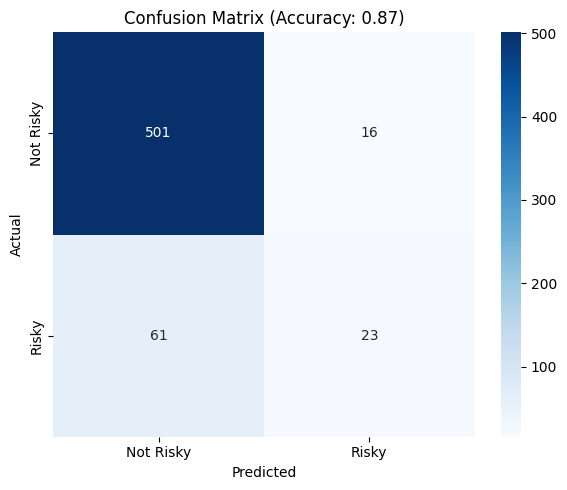

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("/content/drive/My Drive/rubicon_logreg/data/cleaned_data.csv")

# Create binary target: 1 = Risky, 0 = Not Risky
risky_labels = ['Relatively Moderate', 'Relatively High', 'Very High']
df['Risk_Label'] = df['WFIR_RISKR'].apply(lambda x: 1 if x in risky_labels else 0)

# One-hot encode the 'State' column
df_encoded = pd.get_dummies(df, columns=['State'], drop_first=True)

# Define features and target
features = ['Drought Score', 'Average Annual Precipitation', 'Average Summer Temperature'] + \
           [col for col in df_encoded.columns if col.startswith('State_')]
X = df_encoded[features]
y = df_encoded['Risk_Label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print evaluation
print("Classification Report:\n", report)
print(f"Accuracy: {acc:.4f}")

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Risky', 'Risky'],
            yticklabels=['Not Risky', 'Risky'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Accuracy: {acc:.2f})')
plt.tight_layout()
plt.show()
